In [2]:
%load_ext autoreload
%autoreload 2

import sys
#sys.path.append('/global/homes/l/lbigwood/LSS/py')
sys.path.append('/global/homes/l/lbigwood/S4Mock/')

import S4Mock_io
import geometry
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np
from   desitarget.targets import desi_mask, bgs_mask, mws_mask, scnd_mask
from astropy.table import Table
nside=32
orig_density_per_deg = 2500
from corr_func_tools import calc_wtheta, create_axes

In [8]:
pixel_area = hp.nside2pixarea(nside,degrees=True)
pixel_area

3.357174580844667

In [42]:
number=1
ns = np.arange(0, number, 1)
print(ns)   
#min_cols = ['RA' , 'DEC', 'MASKBITS', 'NOBS_G', 'NOBS_R', 'NOBS_Z']
    
#rand = np.hstack([fitsio.read(f'/global/cfs/cdirs/desi/target/catalogs/dr9/0.49.0/randoms/resolve/randoms-1-{nn}.fits', columns=min_cols) for nn in ns])

[0]


In [10]:
#open randoms
randoms = S4Mock_io.read_desitargetrandoms(number=1)

In [4]:
len(randoms)

51738616

In [11]:
#apply bgs mask to randoms and printed statement shows cuts 
randoms=geometry.bgs_mask_randoms(randoms)

[1, 13]
BRIGHT 1 0.9905997485514495
CLUSTER 13 0.9904709859266433
NOBS 0.9771151783418405


In [12]:
target_pixel_density = geometry.targ_hpmap(randoms)

/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/healpy/projaxes.py:541: UserWarning: 0.0 180.0 -180.0 180.0
  warnings.warn(
/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/healpy/projaxes.py:656: UserWarning: The interval between parallels is 20 deg 0.00'.
  warnings.warn(
/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/healpy/projaxes.py:664: UserWarning: The interval between meridians is 20 deg 0.00'.
  warnings.warn(


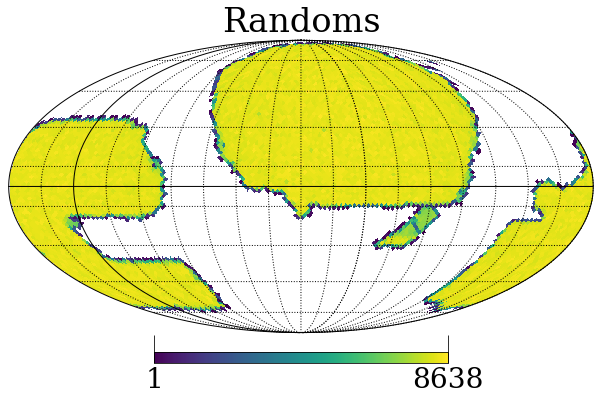

In [13]:
#target_pixel_density = geometry.targ_hpmap(randoms)
#mollview map of pixels
hp.mollview(target_pixel_density,nest=True,rot=(220, 0.0, 0.0), badcolor='white',title='Randoms')
hp.graticule(dpar=5, dmer=5)

In [14]:
#Caluclate norm i.e corr_pixel_area
pixel_area = hp.nside2pixarea(nside,degrees=True)

exp_density_per_pixel = pixel_area *orig_density_per_deg
filling_factor= target_pixel_density/exp_density_per_pixel
corr_pixel_area = pixel_area * filling_factor

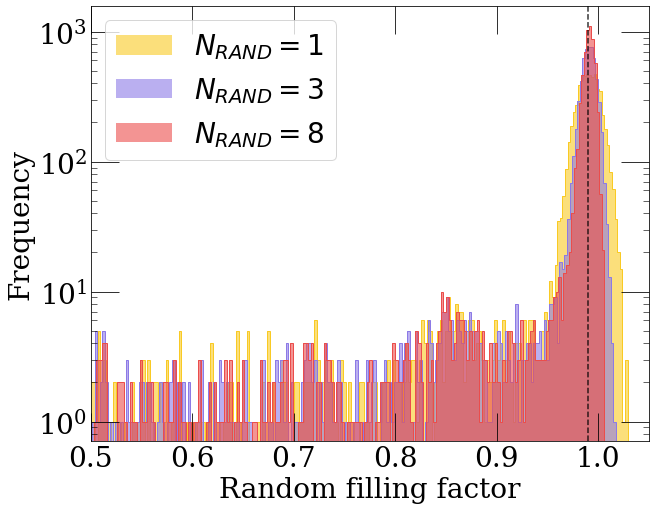

In [83]:
#histogram of filling factor: why does it have this shape?
#np.arange(0.0, 2.0, 0.025)

plt.rc('xtick',direction='in',labelsize=28,top=True)
plt.rc('ytick',direction='in',labelsize=28, right = True)
plt.rc('xtick.major',size = 28)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 28)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 28)
plt.rc('legend',fontsize=28)
plt.rc('font', family='serif',size=28)

plt.figure(figsize=(10,8))

_ = plt.hist(filling_factor, bins=400, histtype='step', color = '#f9ca24')
_ = plt.hist(filling_factor, bins=400, histtype='bar', color = '#f9ca24',alpha =0.6,label = r'$N_{RAND}=1$')

_ = plt.hist(filling_factor3, bins=400, histtype='step', color = '#8c7ae6')
_ = plt.hist(filling_factor3, bins=400, histtype='bar', color = '#8c7ae6',alpha =0.6,label = r'$N_{RAND}=3$')

_ = plt.hist(filling_factor8, bins=400, histtype='step', color = '#eb4d4b')
_ = plt.hist(filling_factor8, bins=400, histtype='bar', color = '#eb4d4b',alpha =0.6,label = r'$N_{RAND}=8$')

filling_factor8 = filling_factor8[~np.isnan(filling_factor8)]
plt.axvline(x= np.percentile(filling_factor8,50),linestyle='dashed',color='k',alpha=0.8)

plt.xlabel('Random filling factor')
plt.ylabel('Frequency')
plt.yscale('log')
plt.xlim(0.5,1.05)
plt.legend()
plt.savefig('filling_factor.png',bbox_inches='tight')

In [84]:
np.percentile(filling_factor8,50)

0.9902523446259284

In [3]:
main_survey_targs = S4Mock_io.read_mainsurvey_targets()

Runtime of 0.156972 seconds after 0 pixels
Runtime of 6.438724 seconds after 20 pixels
Runtime of 11.251154 seconds after 40 pixels
Runtime of 17.289497 seconds after 60 pixels
Runtime of 21.345953 seconds after 80 pixels
Runtime of 26.418913 seconds after 100 pixels
Runtime of 34.273890 seconds after 120 pixels
Runtime of 37.978863 seconds after 140 pixels
Runtime of 42.221382 seconds after 160 pixels
Runtime of 48.383039 seconds after 180 pixels
Runtime of 53.565450 seconds after 200 pixels
Runtime of 57.662799 seconds after 220 pixels
Runtime of 60.903713 seconds after 240 pixels
Runtime of 64.964850 seconds after 260 pixels
Runtime of 68.961685 seconds after 280 pixels
Runtime of 75.791723 seconds after 300 pixels
Runtime of 81.835789 seconds after 320 pixels
Runtime of 86.547587 seconds after 340 pixels
Runtime of 90.260634 seconds after 360 pixels
Runtime of 93.154663 seconds after 380 pixels
Runtime of 96.969342 seconds after 400 pixels
Runtime of 101.939245 seconds after 420 pi

In [7]:
bgs_main_survey_targs = main_survey_targs[((main_survey_targs['DESI_TARGET'] & desi_mask['BGS_ANY']) != 0)]
mws_main_survey_targs = main_survey_targs[((main_survey_targs['DESI_TARGET'] & desi_mask['MWS_ANY']) != 0)]

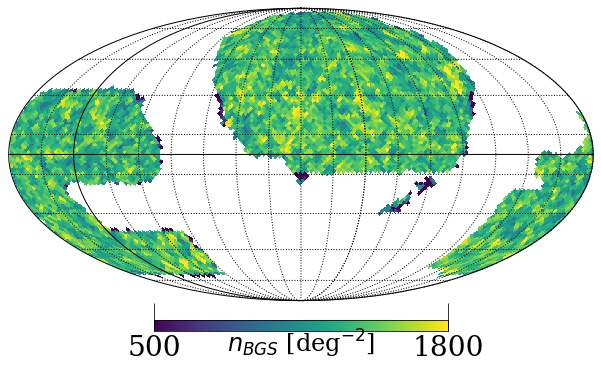

In [17]:
plt.rc('xtick',direction='in',labelsize=28,top=True)
plt.rc('ytick',direction='in',labelsize=28, right = True)
plt.rc('xtick.major',size = 28)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 28)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 28)
plt.rc('legend',fontsize=28)
plt.rc('font', family='serif',size=28)

bgs_target_pixel_density = geometry.targ_hpmap(bgs_main_survey_targs,norm=corr_pixel_area,filling_factor=filling_factor)

#mollview map of pixels
#mollview map of pixels
hp.mollview(bgs_target_pixel_density,nest=True,rot=(220, 0.0, 0.0), badcolor='white',title=None,min=500,max=1800,unit = r'$n_{BGS}$ [deg$^{-2}$]')
hp.graticule(dpar=5, dmer=5) 

f = plt.gcf() # accessing the current figure...
CbAx = f.get_children()[2] # ... then the colorbar's elements
coord_text_obj = CbAx.get_children()[1] # [1] corresponds to the particular label of the
                                        # colorbar, i.e. "Field value" in this case
coord_text_obj.set_fontsize(24)
plt.savefig('bgs_map.png',bbox_inches='tight')

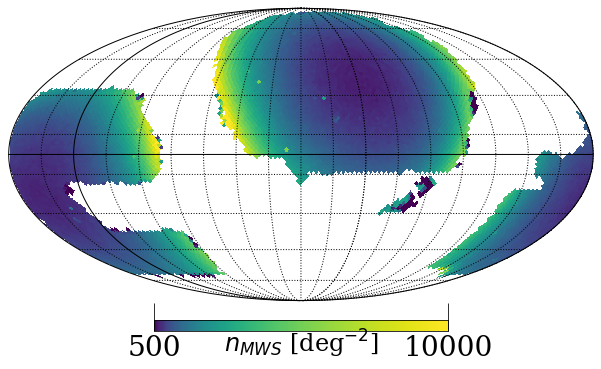

In [18]:
plt.rc('xtick',direction='in',labelsize=28,top=True)
plt.rc('ytick',direction='in',labelsize=28, right = True)
plt.rc('xtick.major',size = 28)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 28)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 28)
plt.rc('legend',fontsize=28)
plt.rc('font', family='serif',size=28)

mws_target_pixel_density = geometry.targ_hpmap(mws_main_survey_targs,norm=corr_pixel_area,filling_factor=filling_factor)

#mollview map of pixels
#mollview map of pixels
hp.mollview(mws_target_pixel_density,nest=True,rot=(220, 0.0, 0.0), badcolor='white',title=None,min=500,max=10000,unit = r'$n_{MWS}$ [deg$^{-2}$]',norm='log')
hp.graticule(dpar=5, dmer=5) 

f = plt.gcf() # accessing the current figure...
CbAx = f.get_children()[2] # ... then the colorbar's elements
coord_text_obj = CbAx.get_children()[1] # [1] corresponds to the particular label of the
                                        # colorbar, i.e. "Field value" in this case
coord_text_obj.set_fontsize(24)
plt.savefig('mws_map.png',bbox_inches='tight')

In [4]:
bgs_bright_targs = main_survey_targs[((main_survey_targs['BGS_TARGET'] & bgs_mask['BGS_BRIGHT']) != 0)]

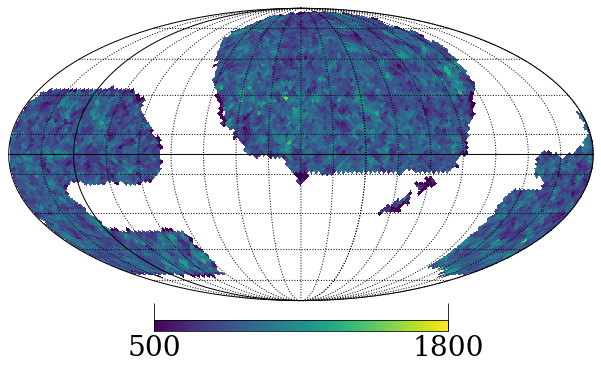

In [20]:

bgs_bright_targs_density = geometry.targ_hpmap(bgs_bright_targs,norm=corr_pixel_area,filling_factor=filling_factor)
hp.mollview(bgs_bright_targs_density,nest=True,rot=(220, 0.0, 0.0), badcolor='white',title=None,min=500,max=1800)
hp.graticule(dpar=5, dmer=5) 


[1, 13]
BRIGHT 1 0.9905997485514495
CLUSTER 13 0.9904709859266433
NOBS 0.9771151783418405


/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/healpy/projaxes.py:541: UserWarning: 0.0 180.0 -180.0 180.0
  warnings.warn(
/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/healpy/projaxes.py:656: UserWarning: The interval between parallels is 20 deg 0.00'.
  warnings.warn(
/global/common/software/desi/cori/desiconda/20200801-1.4.0-spec/conda/lib/python3.8/site-packages/healpy/projaxes.py:664: UserWarning: The interval between meridians is 20 deg 0.00'.
  warnings.warn(


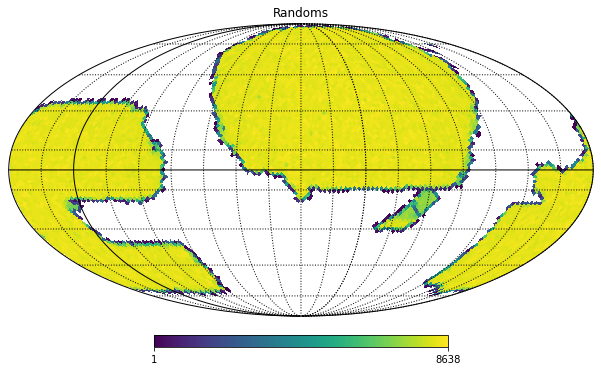

In [5]:

randoms = S4Mock_io.read_desitargetrandoms(number=1)
randoms=geometry.bgs_mask_randoms(randoms)
target_pixel_density = geometry.targ_hpmap(randoms)
hp.mollview(target_pixel_density,nest=True,rot=(220, 0.0, 0.0), badcolor='white',title='Randoms')
hp.graticule(dpar=5, dmer=5)


In [34]:
targ_pix = geometry.radec2pix(bgs_bright_targs['RA'],bgs_bright_targs['DEC'], nside=32)
bgs_bright_targs['HPX']=targ_pix

targ_pix = geometry.radec2pix(randoms['RA'],randoms['DEC'], nside=32)
randoms=Table(randoms)
randoms['HPX']=targ_pix


pix = geometry.rand_inrect(240,260,10,30)

bgs_bright_targs_small = bgs_bright_targs[np.in1d(bgs_bright_targs['HPX'].data,pix)]
randoms_small = randoms[np.in1d(randoms['HPX'].data,pix)]


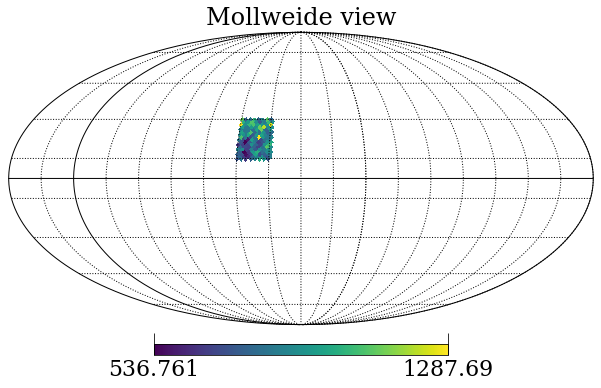

In [35]:
target_pixel_density = geometry.targ_hpmap(bgs_bright_targs_small)
hp.mollview(target_pixel_density/pixel_area,nest=True,rot=(220, 0.0, 0.0), badcolor='white')
hp.graticule(dpar=5, dmer=5)


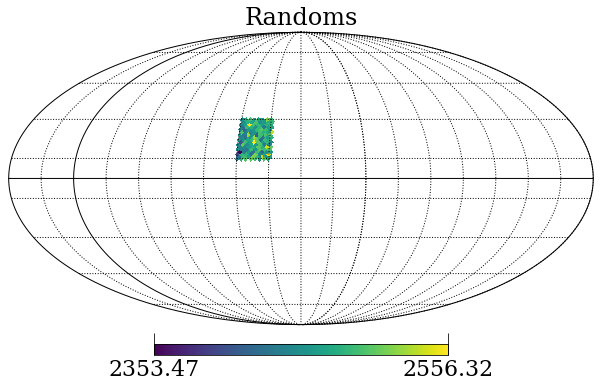

In [36]:
target_pixel_density = geometry.targ_hpmap(randoms_small)
hp.mollview(target_pixel_density/pixel_area,nest=True,rot=(220, 0.0, 0.0), badcolor='white',title='Randoms')
hp.graticule(dpar=5, dmer=5)


In [ ]:
targ_wtheta =  calc_wtheta(bgs_bright_targs_small['RA'],bgs_bright_targs_small['DEC'],randoms_small['RA'],randoms_small['DEC'],nbins=30)

In [ ]:
#mock_all with error bars 

wtheta_all = np.load('/global/u2/l/lbigwood/S4Mock/docs/nb/wtheta_all.npy')
mean = np.mean(wtheta_all,axis=0)
stdev = np.std(wtheta_all,axis=0)

wtheta_main_mock = np.load('/global/u2/l/lbigwood/S4Mock/docs/nb/wtheta_main_mock.npy')

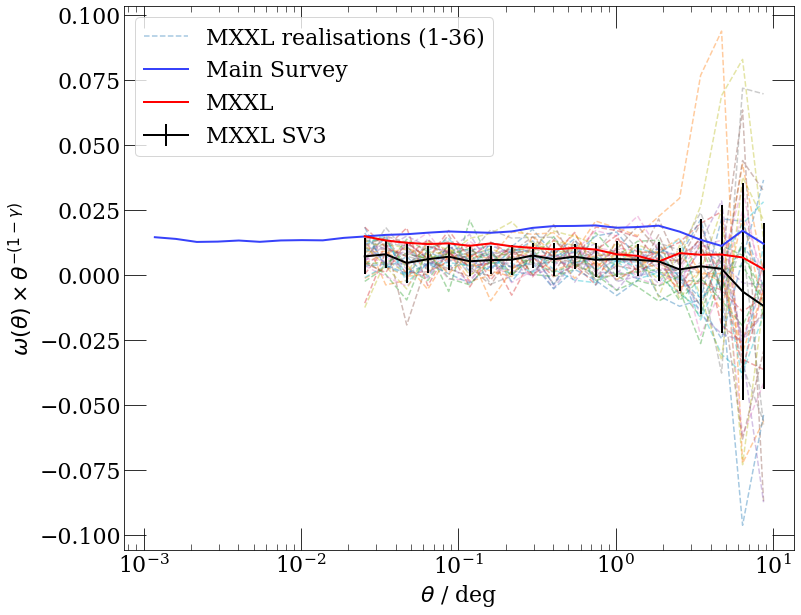

In [30]:
plt.figure(figsize=(12,10))
plt.rc('xtick',direction='in',labelsize=22,top=True)
plt.rc('ytick',direction='in',labelsize=22, right = True)
plt.rc('xtick.major',size = 22)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 22)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 22)
plt.rc('legend',fontsize=22)
plt.rc('font', family='serif',size=20)


#mxxl all
x_axis1,y_axis1 = create_axes(wtheta_all[0])
plt.plot(x_axis1,y_axis1,alpha = 0.4,linestyle='dashed',label='MXXL realisations (1-36)')


for i in range(1,len(wtheta_all)):
    x_axis1,y_axis1 = create_axes(wtheta_all[i])
    plt.plot(x_axis1,y_axis1,alpha = 0.4,linestyle='dashed')

    
x_axis1,y_axis1 = create_axes(mean)
x_axis1,y_axis_err = create_axes(stdev)

plt.errorbar(x_axis1[10:],y_axis1[10:],yerr=y_axis_err[10:],color= 'black',label='MXXL SV3',zorder=3,linewidth=2)


#real all
x_axis,y_axis = create_axes(targ_wtheta)

plt.plot(x_axis,y_axis,color= '#3742fa',label='Main Survey',zorder=3,linewidth=2)

#mock main all
x_axis,y_axis = create_axes(wtheta_main_mock)

plt.plot(x_axis,y_axis,color= 'red',label='MXXL',zorder=3,linewidth=2)


plt.ylabel(r'$\omega (\theta)\times \theta^{-(1-\gamma)}$')
plt.xlabel(r'$\theta$ / deg')
plt.xscale('log')
plt.legend()

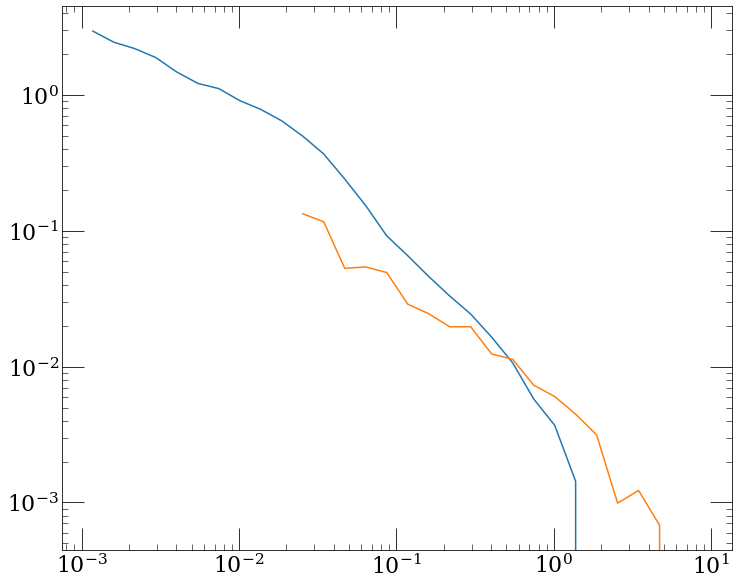

In [15]:
nbins =30

plt.figure(figsize=(12,10))
plt.rc('xtick',direction='in',labelsize=22,top=True)
plt.rc('ytick',direction='in',labelsize=22, right = True)
plt.rc('xtick.major',size = 22)
plt.rc('xtick.minor',size = 6)
plt.rc('ytick.major',size = 22)
plt.rc('ytick.minor',size = 6)
plt.rc('axes', labelsize = 22)
plt.rc('legend',fontsize=22)
plt.rc('font', family='serif',size=20)

bins = np.logspace(-3, 1, nbins + 1, base=10)
x_axis = []
for i in range(len(bins)-1):
    x_axis.append((bins[i]+bins[i+1])/2)
    
plt.plot(x_axis,targ_wtheta)
plt.plot(x_axis,mean)
plt.xscale('log')
plt.yscale('log')


In [ ]:
#select only whole healpix 